<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-로드-및-탐색" data-toc-modified-id="데이터-로드-및-탐색-1">데이터 로드 및 탐색</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#데이터-로드" data-toc-modified-id="데이터-로드-1.0.1">데이터 로드</a></span></li><li><span><a href="#기초통계량" data-toc-modified-id="기초통계량-1.0.2">기초통계량</a></span></li><li><span><a href="#타겟-변수-분포" data-toc-modified-id="타겟-변수-분포-1.0.3">타겟 변수 분포</a></span></li><li><span><a href="#예측변수-분포" data-toc-modified-id="예측변수-분포-1.0.4">예측변수 분포</a></span></li><li><span><a href="#변수간-상관관계" data-toc-modified-id="변수간-상관관계-1.0.5">변수간 상관관계</a></span></li></ul></li></ul></li><li><span><a href="#데이터-준비" data-toc-modified-id="데이터-준비-2">데이터 준비</a></span></li><li><span><a href="#모델링" data-toc-modified-id="모델링-3">모델링</a></span><ul class="toc-item"><li><span><a href="#로지스틱-회귀모형" data-toc-modified-id="로지스틱-회귀모형-3.1">로지스틱 회귀모형</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.2">XGBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.3">LightGBM</a></span></li><li><span><a href="#Stacking" data-toc-modified-id="Stacking-3.4">Stacking</a></span></li></ul></li><li><span><a href="#모델링-결과-해석" data-toc-modified-id="모델링-결과-해석-4">모델링 결과 해석</a></span><ul class="toc-item"><li><span><a href="#모델-성능-비교" data-toc-modified-id="모델-성능-비교-4.1">모델 성능 비교</a></span></li><li><span><a href="#로지스틱-회귀-계수" data-toc-modified-id="로지스틱-회귀-계수-4.2">로지스틱 회귀 계수</a></span></li><li><span><a href="#Feature-importance-of-XGBoost" data-toc-modified-id="Feature-importance-of-XGBoost-4.3">Feature importance of XGBoost</a></span></li><li><span><a href="#주요-변수-시각화" data-toc-modified-id="주요-변수-시각화-4.4">주요 변수 시각화</a></span></li></ul></li><li><span><a href="#클러스터링" data-toc-modified-id="클러스터링-5">클러스터링</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

In [2]:
# 셀에서 값을 모두 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# 한글폰트적용
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [4]:
pd.set_option("display.float", "{:.2f}".format)
pd.set_option("display.max_columns", None)
warnings.filterwarnings(action='ignore')

# 데이터 로드 및 탐색

### 데이터 로드

In [140]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [109]:
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.00,1.00,1.00,1.00,40.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,5.00,18.00,15.00,1.00,0.00,9.00,4.00,3.00
1,0.00,0.00,0.00,0.00,25.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,7.00,6.00,1.00
2,0.00,1.00,1.00,1.00,28.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,5.00,30.00,30.00,1.00,0.00,9.00,4.00,8.00
3,0.00,1.00,0.00,1.00,27.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,11.00,3.00,6.00
4,0.00,1.00,1.00,1.00,24.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,3.00,0.00,0.00,0.00,11.00,5.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.00,1.00,1.00,1.00,45.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,3.00,0.00,5.00,0.00,1.00,5.00,6.00,7.00
253676,0.00,1.00,1.00,1.00,18.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,1.00,0.00,4.00,0.00,0.00,1.00,0.00,11.00,2.00,4.00
253677,0.00,0.00,0.00,1.00,28.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,2.00,5.00,2.00
253678,0.00,1.00,0.00,1.00,23.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,3.00,0.00,0.00,0.00,1.00,7.00,5.00,1.00


타겟변수
* HeartDiseasorAttack: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

예측변수
* HighBP: Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional
* HighChol: Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high?
* CholCheck: Cholesterol check within past five years
* BMI
* Smoker: Have you smoked at least 100 cigarettes in your entire life?
* Stroke: (Ever told) you had a stroke
* Diabetes: (Ever told) you have diabetes
* PhysActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
* Fruits: Consume Fruit 1 or more times per day
* Veggies: Consume Vegetables 1 or more times per day
* HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per
week)
* AnyHealthcare: Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?
* NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
* GenHlth: General health condition
* MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
* PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
* DiffWalk: Do you have serious difficulty walking or climbing stairs?
* Sex
* Age
* Education
* Income

In [110]:
pd.DataFrame({
    'Data type':df.dtypes,
    'Number of unique values':df.nunique(),
    '% of missing values':df.isna().sum()/len(df)
})

,Data type,Number of unique values,% of missing values
HeartDiseaseorAttack,float64,2,0.00
HighBP,float64,2,0.00
HighChol,float64,2,0.00
CholCheck,float64,2,0.00
BMI,float64,84,0.00
Smoker,float64,2,0.00
Stroke,float64,2,0.00
Diabetes,float64,3,0.00
PhysActivity,float64,2,0.00
Fruits,float64,2,0.00


In [6]:
# 범주형/수치형 변수 구분
target = ['HeartDiseaseorAttack']

num_cols = [col for col in df.columns if df[col].nunique() > 10]
num_cols = num_cols + ['Income']

cat_cols = [col for col in df.columns if col not in target + num_cols]

print(num_cols)
print(cat_cols)

['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Income']
['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Education']


### 기초통계량

In [112]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00
mean,0.09,0.43,0.42,0.96,28.38,0.44,0.04,0.30,0.76,0.63,0.81,0.06,0.95,0.08,2.51,3.18,4.24,0.17,0.44,8.03,5.05,6.05
std,0.29,0.49,0.49,0.19,6.61,0.50,0.20,0.70,0.43,0.48,0.39,0.23,0.22,0.28,1.07,7.41,8.72,0.37,0.50,3.05,0.99,2.07
min,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,1.00,24.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,6.00,4.00,5.00
50%,0.00,0.00,0.00,1.00,27.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,8.00,5.00,7.00
75%,0.00,1.00,1.00,1.00,31.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,3.00,2.00,3.00,0.00,1.00,10.00,6.00,8.00
max,1.00,1.00,1.00,1.00,98.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,30.00,30.00,1.00,1.00,13.00,6.00,8.00


### 타겟 변수 분포

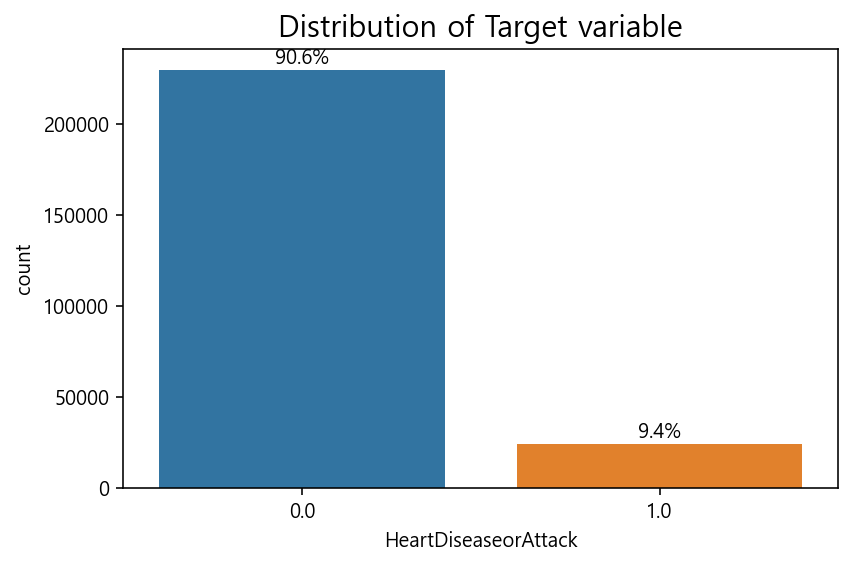

In [113]:
ax = sns.countplot(df['HeartDiseaseorAttack'])
_ = plt.title('Distribution of Target variable', fontdict={'fontsize':15})

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    _ = ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

### 예측변수 분포

In [114]:
len(cat_cols)

16

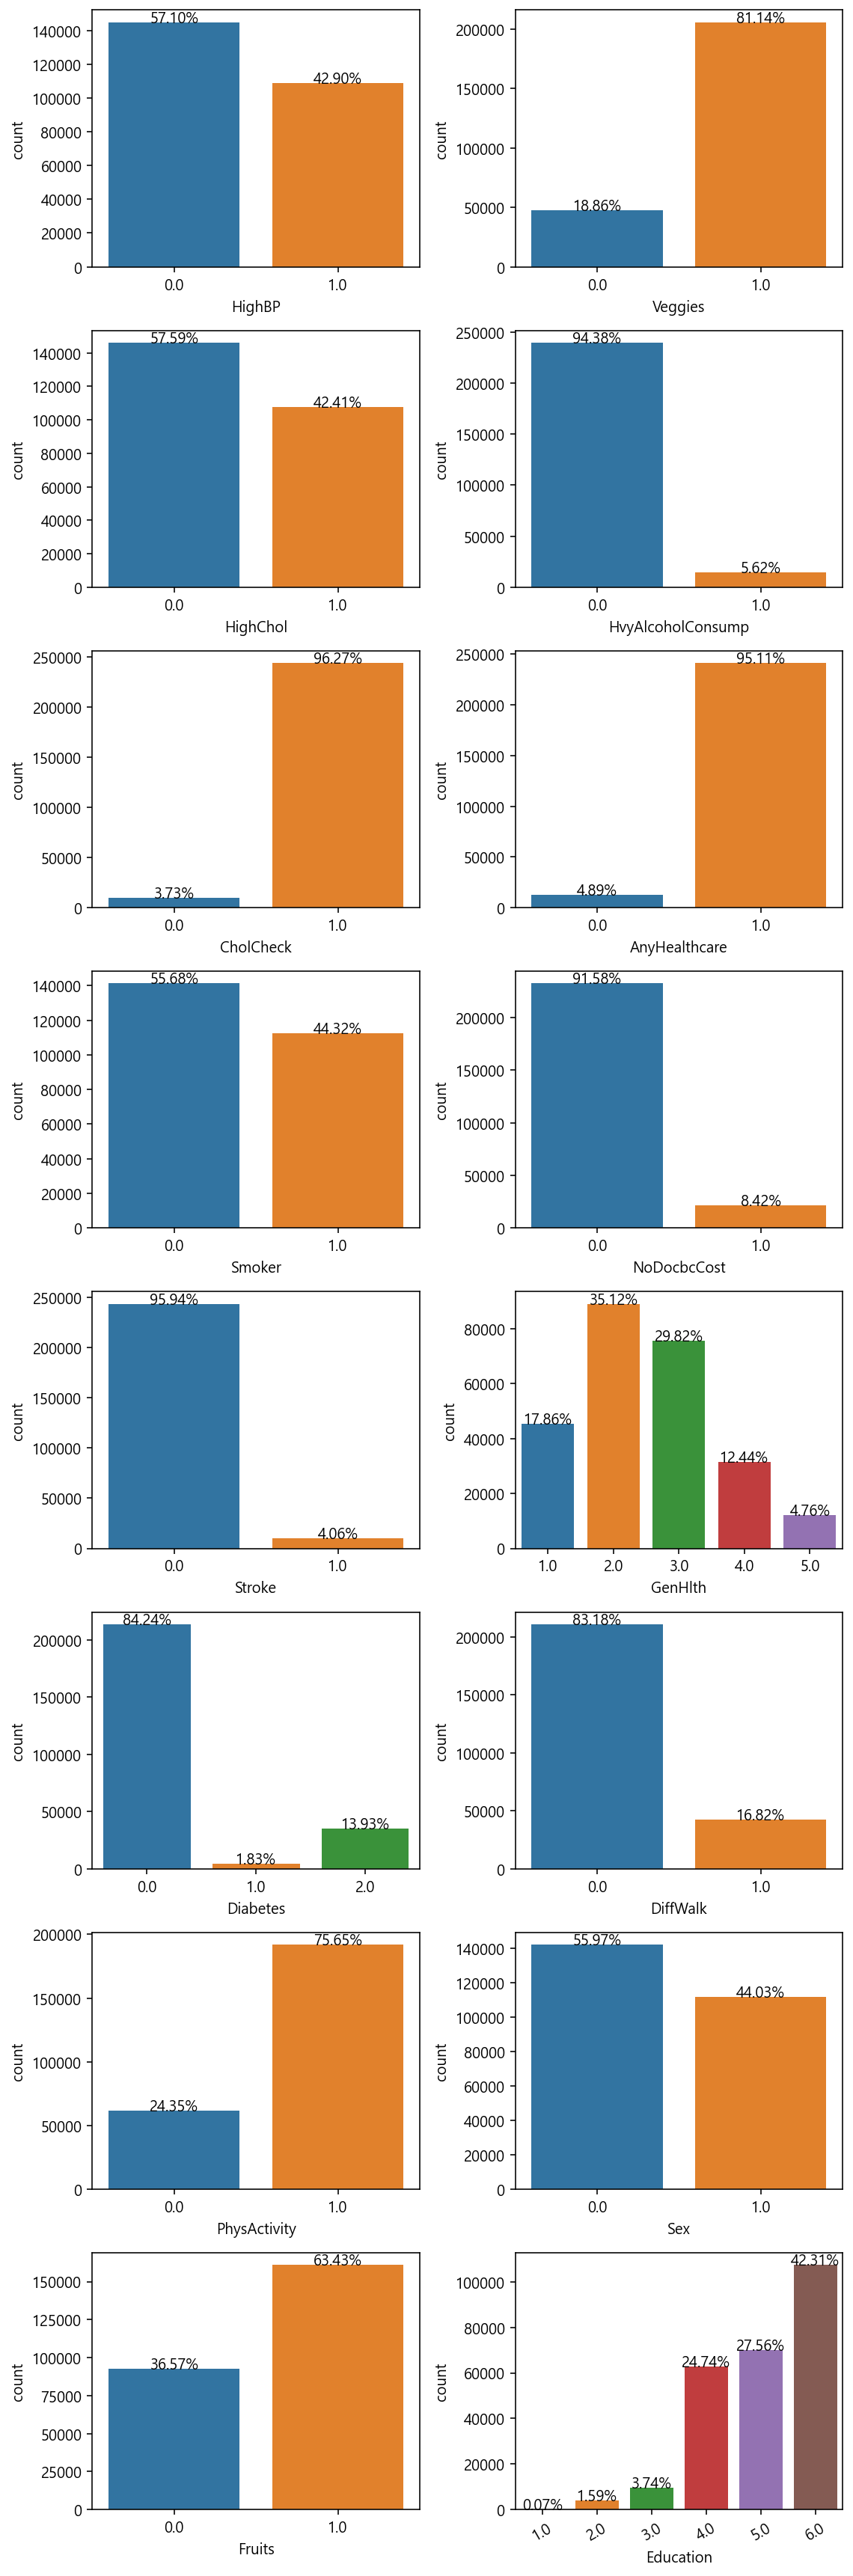

In [115]:
fig, axes = plt.subplots(8, 2, figsize = (8, 3*8))

for ind, col in enumerate(cat_cols):
    _ = sns.countplot(x=col, data=df, ax=axes[np.where(ind < 8, ind, ind-8), np.where(ind < 8, 0, 1)])
    _ = plt.xticks(rotation=30)
    
    for p in axes[np.where(ind<8, ind, ind-8), np.where(ind<8, 0, 1)].patches:
        total = len(df[col])
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        _ = axes[np.where(ind<8, ind, ind-8), np.where(ind<8, 0, 1)].annotate(percentage, (x, y),ha='center')    
    
fig.tight_layout()

In [116]:
len(num_cols)

5

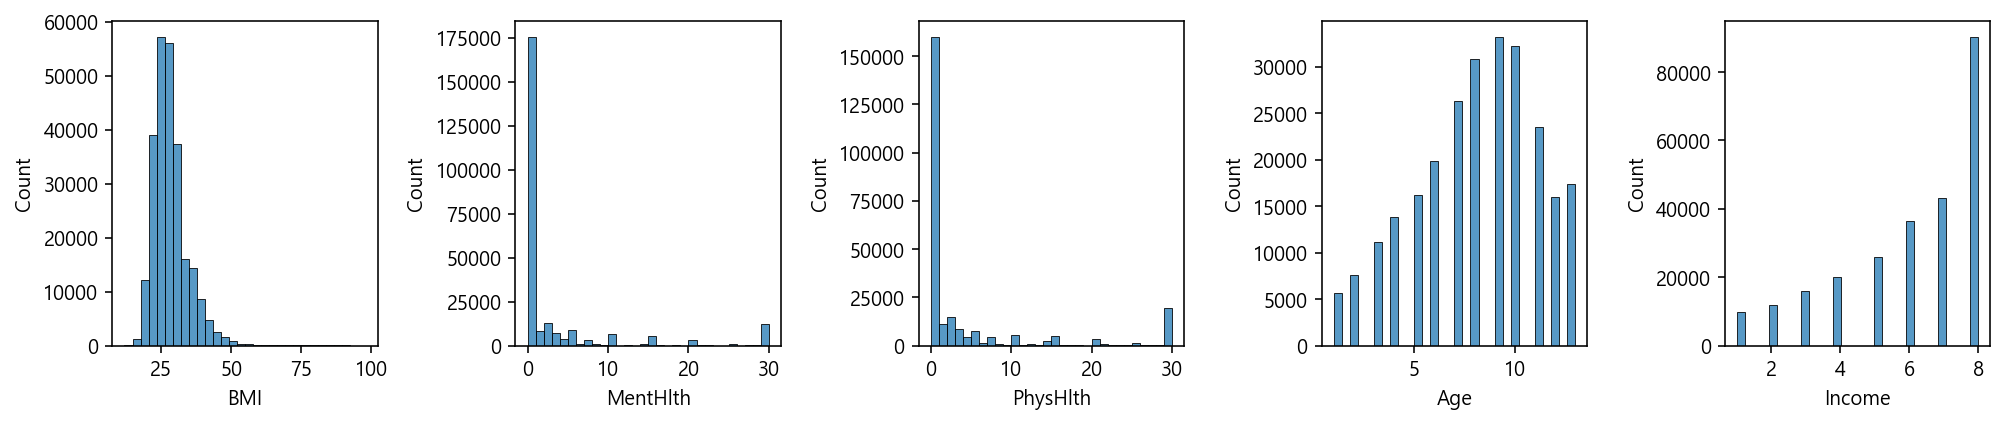

In [117]:
# 히스토그램
fig, ax = plt.subplots(1, 5, figsize=(14, 3))

for ind, col in enumerate(num_cols):
    _ = sns.histplot(x = col, data=df, bins=30, ax = ax[ind])

fig.tight_layout()

In [143]:
from sklearn.preprocessing import PowerTransformer

log = PowerTransformer()
log.fit(df[['BMI']])

df['BMI'] = log.transform(df[['BMI']])

PowerTransformer()

<AxesSubplot:xlabel='BMI', ylabel='Count'>

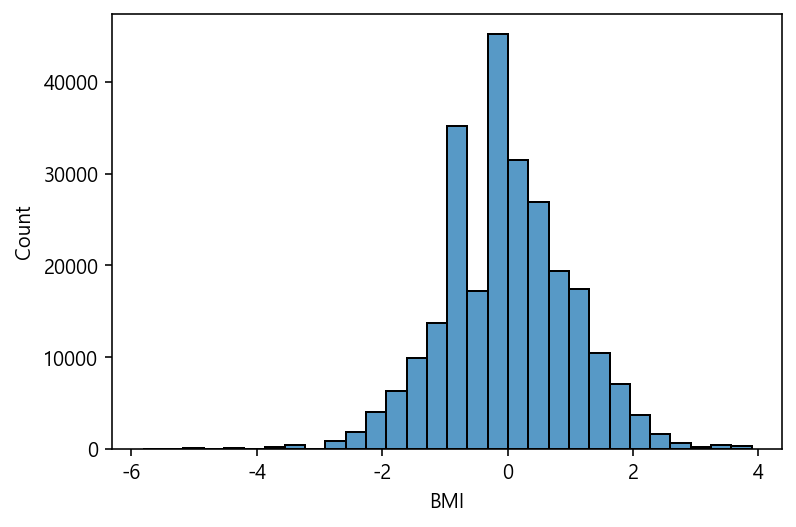

In [144]:
sns.histplot(x='BMI', data=df, bins=30)

### 변수간 상관관계

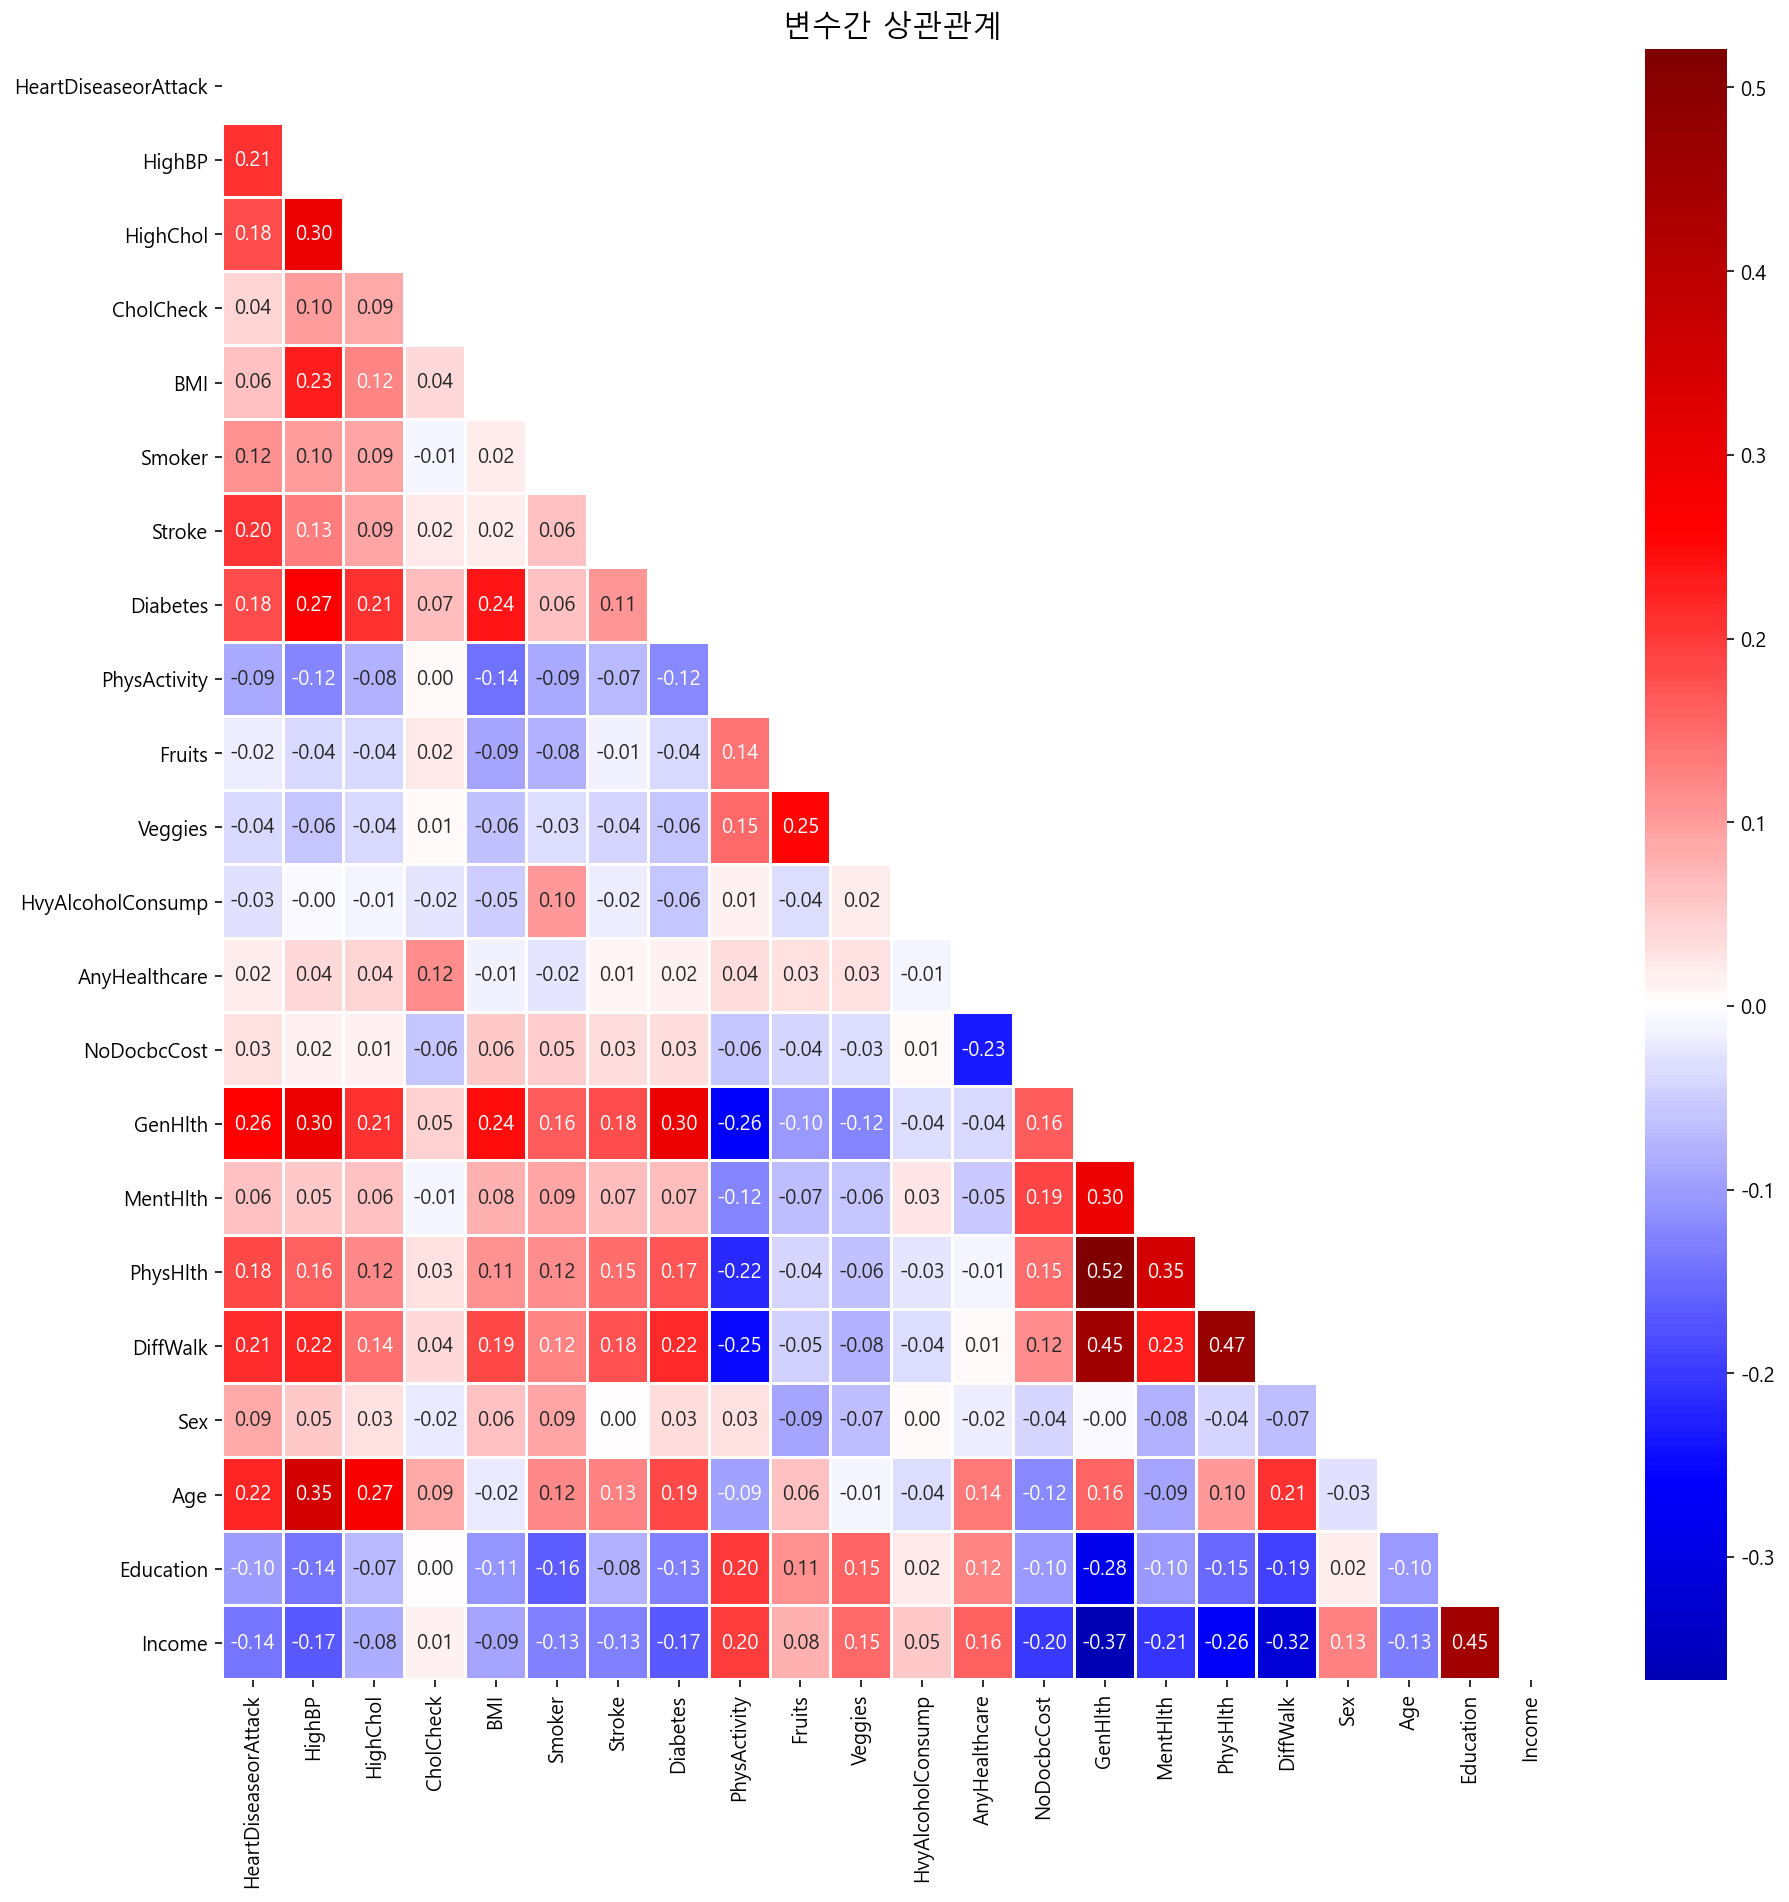

In [9]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
_ = plt.figure(figsize = (15, 15))
_ = sns.heatmap(corr,
           mask = mask,
           annot = True,
           cmap = "seismic",
           center = 0,
           fmt = '.2f',
           linewidths=1)
_ = plt.title('변수간 상관관계', fontdict={'fontsize':15})

# 데이터 준비

In [106]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X = df.drop(target[0], axis=1)
y = df[target[0]]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, stratify=y, random_state=802)

In [107]:
# 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(train_X)
train_X_std = scaler.transform(train_X)
test_X_std = scaler.transform(test_X)

In [12]:
# Over sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE()
train_X_re, train_y_re = smote.fit_resample(train_X_std, train_y)

# 모델링

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score, f1_score
def print_score(actual, pred, prob, split):
    print(f"\n{split} set modeling Result:")
    print("================================================")
    print(confusion_matrix(actual, pred))
    print(f"\nAccuracy Score: {round(accuracy_score(actual, pred), 5)*100}%")
    
    print(f"AU Precision-Recall curve Score: {round(average_precision_score(actual, prob), 5)}")
    print("-----------------------------------------------")
    print(classification_report(actual, pred))
    print("-----------------------------------------------")

## 로지스틱 회귀모형

In [14]:
from sklearn.linear_model import LogisticRegressionCV

logistic = LogisticRegressionCV()
logistic.fit(train_X_re, train_y_re)

LogisticRegressionCV()

In [15]:
print_score(train_y, logistic.predict(train_X_std), logistic.predict_proba(train_X_std)[:, 1], "Train set")


Train set set modeling Result:
[[102664  33638]
 [  2986  11142]]

Accuracy Score: 75.654%
AU Precision-Recall curve Score: 0.37067
-----------------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85    136302
         1.0       0.25      0.79      0.38     14128

    accuracy                           0.76    150430
   macro avg       0.61      0.77      0.61    150430
weighted avg       0.90      0.76      0.80    150430

-----------------------------------------------


In [16]:
print_score(test_y, logistic.predict(test_X_std), logistic.predict_proba(test_X_std)[:, 1], "Test set")


Test set set modeling Result:
[[68078 22791]
 [ 2005  7413]]

Accuracy Score: 75.275%
AU Precision-Recall curve Score: 0.36693
-----------------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     90869
         1.0       0.25      0.79      0.37      9418

    accuracy                           0.75    100287
   macro avg       0.61      0.77      0.61    100287
weighted avg       0.90      0.75      0.80    100287

-----------------------------------------------


In [54]:
scores_dict = {}
scores_dict['Logistic'] = {'Train':round(f1_score(train_y, logistic.predict(train_X_std)), 3),
                           'Test':round(f1_score(test_y, logistic.predict(test_X_std)), 3)}

## XGBoost

In [21]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgboost = xgb.XGBClassifier(verbosity=0, learning_rate=0.01, n_estimators=500, subsample=0.8, colsample_bytree=0.8, n_jobs=-1,
                           early_stopping_rounds=20)
xgb_params = {'max_depth':[5]}
xgb_grid = GridSearchCV(estimator=xgboost, param_grid=xgb_params, cv=3, scoring='recall', verbose=0)

t0 = time.time()
xgb_grid.fit(train_X_re, train_y_re)
t1 = time.time()
print(f"모델링 소요시간: {t1-t0:.2f}초")

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=20, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=

모델링 소요시간: 363.36초


In [129]:
pd.DataFrame(xgb_grid.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,63.19,0.22,0.42,0.01,4,{'max_depth': 4},0.79,0.96,0.96,0.90,0.08,1
2,76.39,0.52,0.45,0.14,5,{'max_depth': 5},0.76,0.97,0.97,0.90,0.10,2
0,51.39,0.15,0.27,0.08,3,{'max_depth': 3},0.81,0.94,0.94,0.90,0.06,3
3,89.50,1.28,0.48,0.13,6,{'max_depth': 6},0.74,0.97,0.98,0.89,0.11,4


In [22]:
xgb_best = xgb_grid.best_estimator_

In [23]:
print_score(train_y, xgb_best.predict(train_X_std), xgb_best.predict_proba(train_X_std)[:, 1], "Train set")


Train set set modeling Result:
[[124176  12126]
 [  7375   6753]]

Accuracy Score: 87.036%
AU Precision-Recall curve Score: 0.35804
-----------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93    136302
         1.0       0.36      0.48      0.41     14128

    accuracy                           0.87    150430
   macro avg       0.65      0.69      0.67    150430
weighted avg       0.89      0.87      0.88    150430

-----------------------------------------------


In [24]:
print_score(test_y, xgb_best.predict(test_X_std), xgb_best.predict_proba(test_X_std)[:, 1], "Test set")


Test set set modeling Result:
[[82782  8087]
 [ 4989  4429]]

Accuracy Score: 86.961%
AU Precision-Recall curve Score: 0.34939
-----------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93     90869
         1.0       0.35      0.47      0.40      9418

    accuracy                           0.87    100287
   macro avg       0.65      0.69      0.67    100287
weighted avg       0.89      0.87      0.88    100287

-----------------------------------------------


In [55]:
scores_dict['XGB'] = {'Train':round(f1_score(train_y, xgb_best.predict(train_X_std)), 3),
                           'Test':round(f1_score(test_y, xgb_best.predict(test_X_std)), 3)}

## LightGBM

In [42]:
import lightgbm as lgbt
from sklearn.model_selection import GridSearchCV

lgbtmod = lgbt.LGBMClassifier(verbosity=-1, learning_rate=0.01, n_estimators=500, subsample=0.8, feature_fraction=0.8, n_jobs=-1)
lgbt_params = {'max_depth':[5],
              'num_leaves':[2**5, round(2**5*0.8), round(2**5*1.2)]}
lgbt_grid = GridSearchCV(estimator=lgbtmod, param_grid=lgbt_params, cv=3, scoring='recall', verbose=0)

t0 = time.time()
lgbt_grid.fit(train_X_re, train_y_re)
t1 = time.time()
print(f"모델링 소요시간: {t1-t0:.2f}초")

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGB

GridSearchCV(cv=3,
             estimator=LGBMClassifier(feature_fraction=0.8, learning_rate=0.01,
                                      n_estimators=500, subsample=0.8,
                                      verbosity=-1),
             param_grid={'max_depth': [5], 'num_leaves': [32, 26, 38]},
             scoring='recall')

모델링 소요시간: 77.71초


In [43]:
pd.DataFrame(lgbt_grid.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_num_leaves,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.43,0.17,1.10,0.24,5,32,"{'max_depth': 5, 'num_leaves': 32}",0.77,0.97,0.97,0.90,0.10,1
2,6.41,0.71,1.45,0.33,5,38,"{'max_depth': 5, 'num_leaves': 38}",0.77,0.97,0.97,0.90,0.10,1
1,6.47,0.48,1.09,0.23,5,26,"{'max_depth': 5, 'num_leaves': 26}",0.77,0.97,0.97,0.90,0.10,3


In [44]:
lgbt_best = lgbt_grid.best_estimator_

In [45]:
print_score(train_y, lgbt_best.predict(train_X_std), lgbt_best.predict_proba(train_X_std)[:, 1], "Train set")


Train set set modeling Result:
[[123784  12518]
 [  7261   6867]]

Accuracy Score: 86.85199999999999%
AU Precision-Recall curve Score: 0.35739
-----------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93    136302
         1.0       0.35      0.49      0.41     14128

    accuracy                           0.87    150430
   macro avg       0.65      0.70      0.67    150430
weighted avg       0.89      0.87      0.88    150430

-----------------------------------------------


In [46]:
print_score(test_y, lgbt_best.predict(test_X_std), lgbt_best.predict_proba(test_X_std)[:, 1], "Test set")


Test set set modeling Result:
[[82475  8394]
 [ 4919  4499]]

Accuracy Score: 86.725%
AU Precision-Recall curve Score: 0.34908
-----------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93     90869
         1.0       0.35      0.48      0.40      9418

    accuracy                           0.87    100287
   macro avg       0.65      0.69      0.66    100287
weighted avg       0.89      0.87      0.88    100287

-----------------------------------------------


In [56]:
scores_dict['LightGBM'] = {'Train':round(f1_score(train_y, lgbt_best.predict(train_X_std)), 3),
                           'Test':round(f1_score(test_y, lgbt_best.predict(test_X_std)), 3)}

## Stacking

In [47]:
from sklearn.ensemble import VotingClassifier

models = [('Logistic', logistic),
         ('XGBoost', xgb_best),
         ('CatBoost', lgbt_best)]

voting = VotingClassifier(estimators=models, voting='soft', weights=[1, 1, 1])
voting.fit(train_X_re, train_y_re)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


VotingClassifier(estimators=[('Logistic', LogisticRegressionCV()),
                             ('XGBoost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.8,
                                            early_stopping_rounds=20, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.01,
                                            max_delta_step=0, max_depth=5,
                                            min_child_weight=1, missing=...
                                            monotone_constraints='()',
                                            n_estimators=500, n_jobs=-1,
                              

In [48]:
print_score(train_y, voting.predict(train_X_std), voting.predict_proba(train_X_std)[:, 1], "Train set")


Train set set modeling Result:
[[117431  18871]
 [  5457   8671]]

Accuracy Score: 83.828%
AU Precision-Recall curve Score: 0.36566
-----------------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91    136302
         1.0       0.31      0.61      0.42     14128

    accuracy                           0.84    150430
   macro avg       0.64      0.74      0.66    150430
weighted avg       0.90      0.84      0.86    150430

-----------------------------------------------


In [49]:
print_score(test_y, voting.predict(test_X_std), voting.predict_proba(test_X_std)[:, 1], "Test set")


Test set set modeling Result:
[[78156 12713]
 [ 3711  5707]]

Accuracy Score: 83.623%
AU Precision-Recall curve Score: 0.35829
-----------------------------------------------
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90     90869
         1.0       0.31      0.61      0.41      9418

    accuracy                           0.84    100287
   macro avg       0.63      0.73      0.66    100287
weighted avg       0.89      0.84      0.86    100287

-----------------------------------------------


In [57]:
scores_dict['Stacking'] = {'Train':round(f1_score(train_y, voting.predict(train_X_std)), 3),
                           'Test':round(f1_score(test_y, voting.predict(test_X_std)), 3)}

# 모델링 결과 해석

## 모델 성능 비교

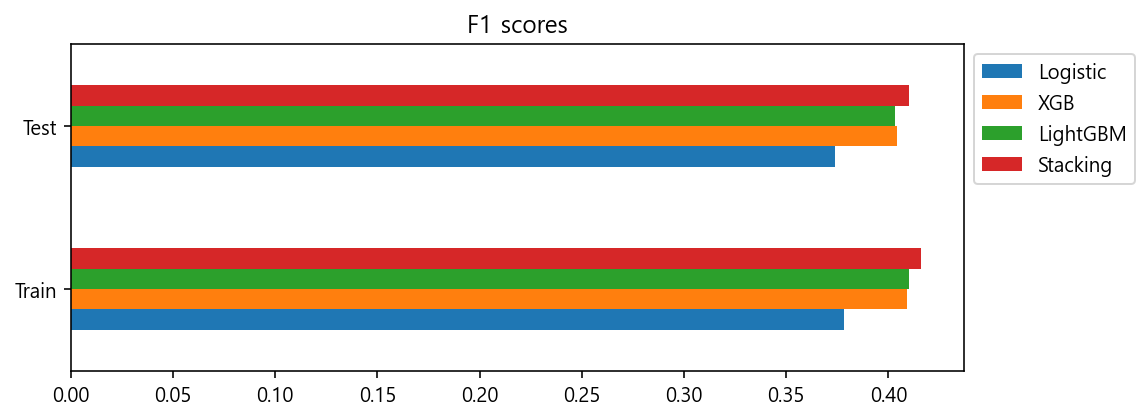

In [58]:
scores_df = pd.DataFrame(scores_dict)

_=scores_df.plot(kind='barh', figsize=(8, 3))
_=plt.title("F1 scores")
_=plt.legend(bbox_to_anchor=(1,1))

In [138]:
# 내가 심장 질환에 걸릴 가능성은?

mine = pd.DataFrame({'HighBP':[0],
       'HighChol':[0],
       'CholCheck':[0],
       'BMI':[22.4],
       'Smoker':[0],
       'Stroke':[0],              
       'Diabetes':[0],
       'PhysActivity':[1],
       'Fruits':[1],
       'Veggies':[1],
       'HvyAlcoholConsump':[0],
       'AnyHealthcare':[1],
       'NoDocbcCost':[0],
       'GenHlth':[1],
       'MentHlth':[10],
       'PhysHlth':[0],
       'DiffWalk':[0],
       'Sex':[1],
       'Age':[2],
       'Education':[6],
       'Income':[1]})
mine

print('내가 심장질환에 걸릴 가능성: {:.2f}%'.format(voting.predict_proba(scaler.transform(mine))[:, 1][0]*100))

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,0,22.40,0,0,0,1,1,1,0,1,0,1,10,0,0,1,2,6,1


내가 심장질환에 걸릴 가능성: 3.42%


## 로지스틱 회귀 계수

In [59]:
coefficients = pd.DataFrame(np.transpose(logistic.coef_), index=X.columns, columns=['Coefficient(Logit)'])

# Logit -> Odds
coefficients['Exp_coefficient(Odds)'] = np.exp(coefficients['Coefficient(Logit)'])

# Logit 절대값 크기순 정렬
coeff_sort = coefficients['Coefficient(Logit)'].abs().sort_values(ascending=False).keys()
coefficients.loc[coeff_sort]

,Coefficient(Logit),Exp_coefficient(Odds)
Age,0.97,2.64
GenHlth,0.62,1.85
Sex,0.43,1.53
HighChol,0.33,1.39
HighBP,0.30,1.35
Stroke,0.21,1.23
Smoker,0.21,1.23
CholCheck,0.11,1.12
DiffWalk,0.11,1.11
NoDocbcCost,0.10,1.11


## Feature importance of XGBoost

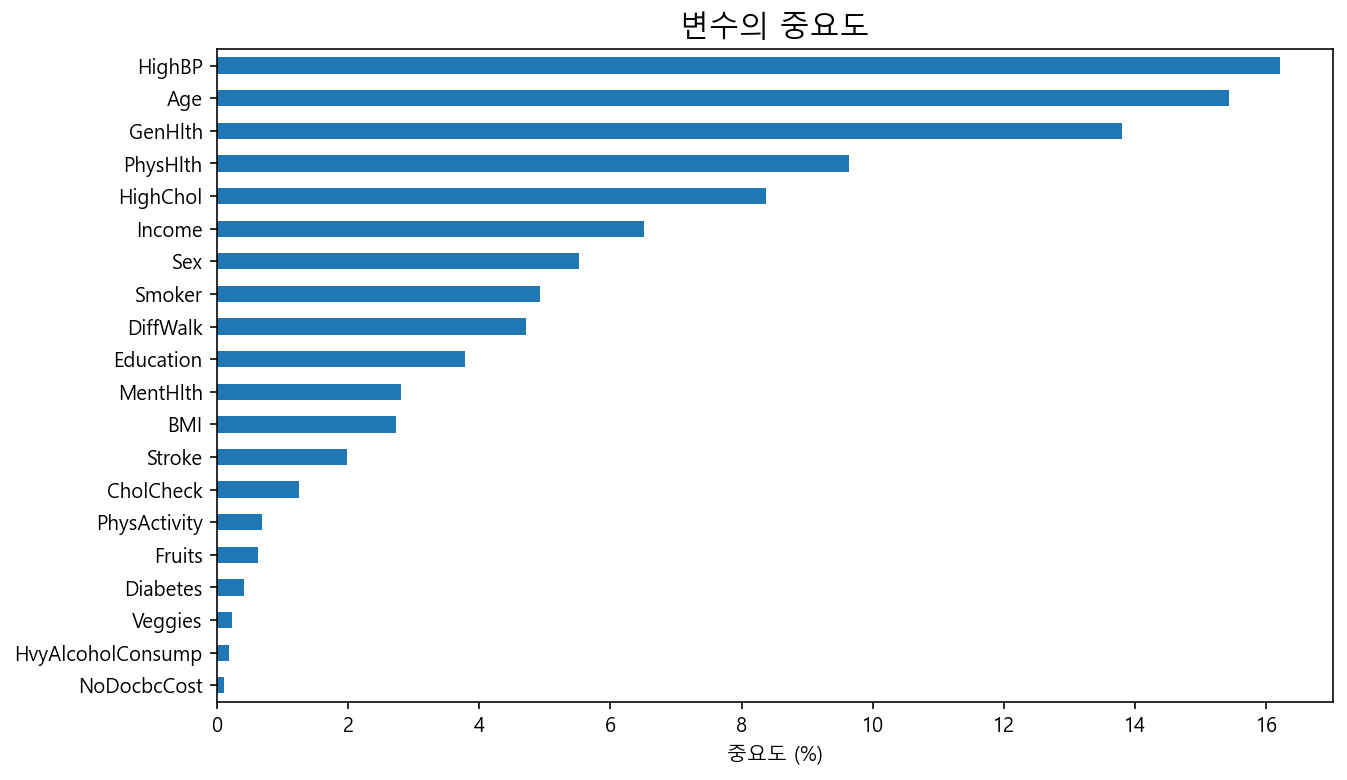

In [60]:
importance_xgb = pd.Series(xgb_best.feature_importances_*100, index=X.columns).sort_values(ascending=True)

_ = plt.figure(figsize = (10, 6))
_ = importance_xgb[-20:].plot(kind='barh')
_ = plt.title("변수의 중요도", fontdict={'fontsize':15})
_ = plt.xlabel('중요도 (%)')

## 주요 변수 시각화

In [61]:
important_features = coeff_sort[:8].tolist() + importance_xgb.sort_values(ascending=False)[:8].index.tolist()
important_features = list(set(important_features))
important_features

['HighBP',
 'CholCheck',
 'GenHlth',
 'Stroke',
 'HighChol',
 'PhysHlth',
 'Sex',
 'Smoker',
 'Age',
 'Income']

In [62]:
tmp_visual = df.copy()
tmp_visual['HighChol'].replace({0:'No', 1:'Yes'}, inplace=True)
tmp_visual['HighBP'].replace({0:'No', 1:'Yes'}, inplace=True)
tmp_visual['Stroke'].replace({0:'No', 1:'Yes'}, inplace=True)
tmp_visual['Sex'].replace({0:'Female', 1:'Male'}, inplace=True)
tmp_visual['GenHlth'].replace({1:'Excellent', 2:'Very good', 3:'Good', 4:'Fair', 5:'Poor'}, inplace=True)
tmp_visual['CholCheck'].replace({0:'No', 1:'Yes'}, inplace=True)
tmp_visual['Smoker'].replace({0:'No', 1:'Yes'}, inplace=True)

In [63]:
tmp_visual['GenHlth'] = tmp_visual['GenHlth'].astype('category')
tmp_visual['GenHlth'] = tmp_visual['GenHlth'].cat.reorder_categories(['Excellent', 'Very good', 'Good', 'Fair', 'Poor'])
tmp_visual['GenHlth']

0              Poor
1              Good
2              Poor
3         Very good
4         Very good
            ...    
253675         Good
253676         Fair
253677    Excellent
253678         Good
253679    Very good
Name: GenHlth, Length: 250717, dtype: category
Categories (5, object): ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']

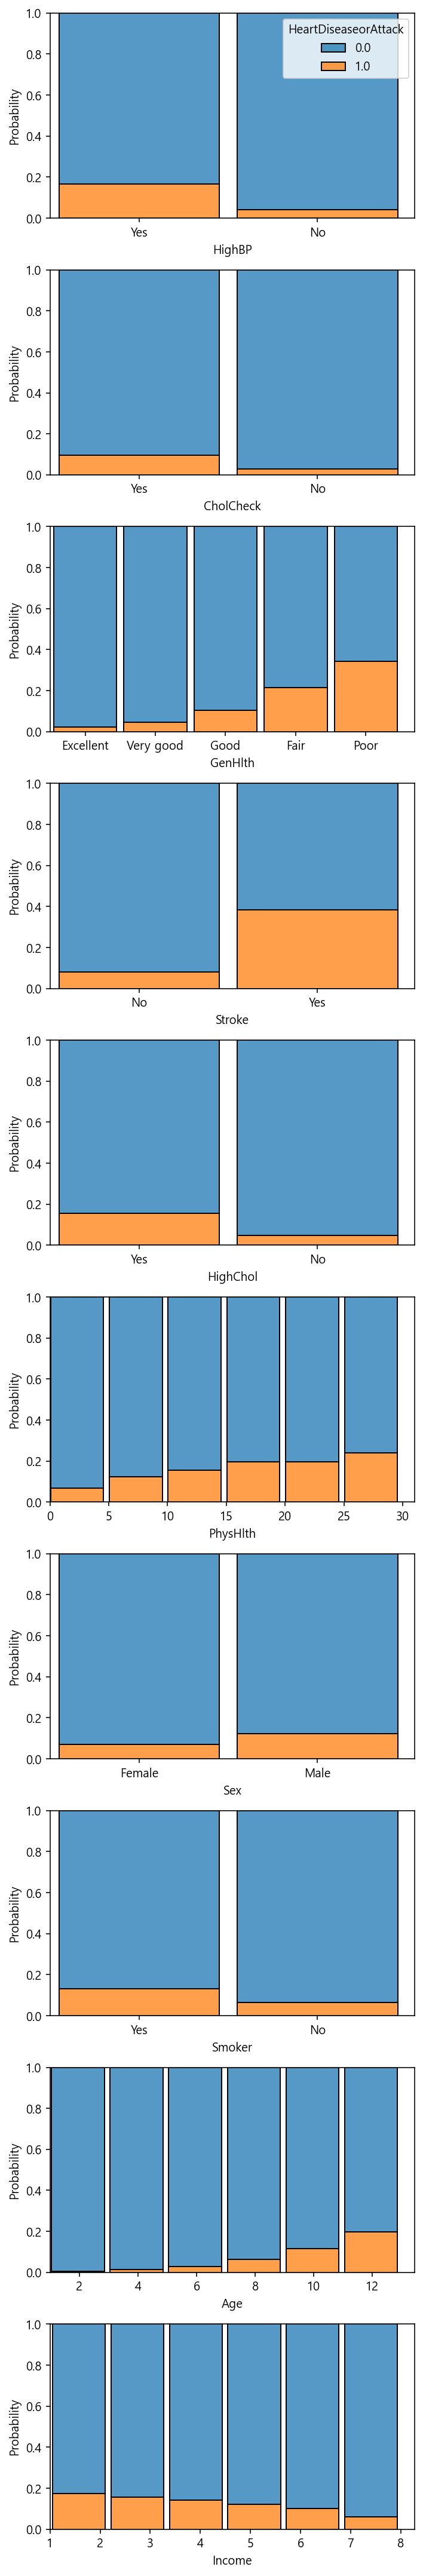

In [67]:
num_rows = len(important_features)
fig, ax = plt.subplots(num_rows, 1, figsize = (5, 3*num_rows))

for ind, col in enumerate(important_features):
    if col in num_cols:
        _ = sns.histplot(hue=target[0], x=col, data=tmp_visual, ax=ax[ind], 
                        stat='probability', multiple='fill', bins=6, shrink=0.9)
            
    else:
        _ = sns.histplot(hue=target[0], x=col, data=tmp_visual, ax=ax[ind], 
                        stat='probability', multiple='fill', shrink=0.9)
    if ind >0:
        _.get_legend().remove()
        
fig.tight_layout()